<a href="https://colab.research.google.com/github/srivatsankr/AXDemo/blob/master/Copy_of_Copy_of_Gradient_Descent_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression, Gradient Descent
##Loss function, 
##Python implementation

##Logistic Regression
Logistic regression is a probabilistic model, used to establish the relationship between a binary dependent variable and one or more independent variables. Let $X_i$ be the independent variable (training variable) and $Y$ be the dependent variable.  Linear Regression predicts probability of outcome of binary dependent variable $(Y)$ and the output lies between 0 and 1.  The prediction equation between $X_i$ and $Y$ is
$$ ln(\frac{p}{1-p}) = b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n $$  $ln(\frac{p}{1-p})$ is *log odds* and denotes the likelihood of the event taking place. It maps the probabilty between 0 and 1. The terms $b_0, b_1, b_2 ...$ are parameters estimated during training of each record. 
The above equation can be rewritten as $$ \frac{p}{1-p}  = e^{b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n} $$ 
simplifying it further
 $$\begin{align*}  p &= \frac{e^{b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n}}{1 + e^{b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n}} \\ \text{or}\\   p &= \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + b_3x_3 ... b_nx_n)}}\\ &\text{This is the equation of the *Sigmoid Function* given by: } \\ 
 σ(x) &= \frac{1}{1+e^{-x}} \\ &\text{Deriving the sigmoid function,} \\ \sigma^\prime(x)=\frac d {dX} \sigma(x) &= \frac d{dX} \frac1{(1+e^{-X})}\\ 
&=\frac d{dX} {(1+e^{-X})^{-1}} \\ &\text{Using reciprocal rule, then rule of linearity,}\\
&=  -(1+e^{-X})^{-2}.\frac d {dX}(1+e^{-X})\\
&= -(1+e^{-X})^{-2}.(\frac d{dX}[1]+\frac d{dX}[e^{-X}])\\
&\text{Derivative of constant is 0,}\\
& = -(1+e^{-X})^{-2}.(0+e^{-X}\frac d{dX}[-X]) \\
& =(1+e^{-X})^{-2}.e^{-X} \\
& = \frac{e^{-X}}{(1+e^{-X})^{2}} \\
&=\frac{1}{(1+e^{-X})}.\frac {e^{-X}+1-1}{(1+e^{-X})}\\
& = \frac{1}{(1+e^{-X})}.(\frac{1+e^{-X}}{1+e^{-X}}-\frac{1}{1+e^{-X}} ) \\
& = \frac{1}{(1+e^{-X})}.(1-\frac{1}{1+e^{-X}} ) \\
& = σ(X).(1-σ(X))
 \end{align*}$$
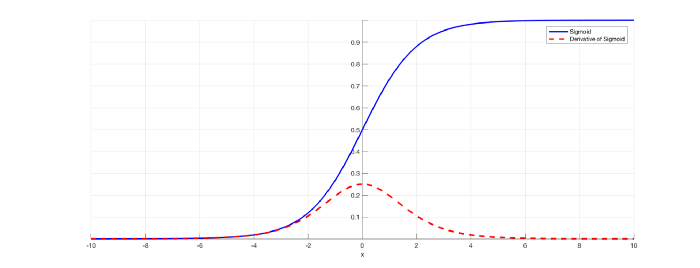 \\
Now we will be using the above derived equation to make our predictions. Before that we will train our model to obtain the values of our parameters $b_0, b_1, b_2 ...$ that result in least error. This is where the error or loss function comes in.
## Loss Function
Loss functions are used to calculate error in a model.  There are two types of Loss functions.  L1 and L2. \\
L1 loss function is used to minimize the error which is the sum of the all the absolute differences between the true value and the predicted value. \\
L2 Loss Function
L2 Loss Function is used to minimize the error which is the sum of the all the squared differences between the true value and the predicted value.

The cost function of linear regression L1 and L2 can’t be used in logistic regression because it is a non-convex function of weights. Optimizing algorithms like i.e gradient descent only converge convex function into a global minimum.

J = - ylog( h(x) ) - ( 1 - y )log( 1 - h(x) )

here, y is the real target value

h( x ) = sigmoid( wx + b )

For y = 0,

J = - log( 1 - h(x) )

and y = 1,

J = - log( h(x) )

Gradient Calculation :

repeat until convergence  { \\
       tmpi = wi - alpha * dwi  \\
       wi = tmpi      } \\
where alpha is the learning rate. \\
Using the chain rule \\

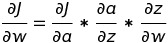 \\
here, a = sigmoid( z ) and z = wx + b.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True) 

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
data.head()

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data = data.dropna()
print(data.shape)
print(list(data.columns))

(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


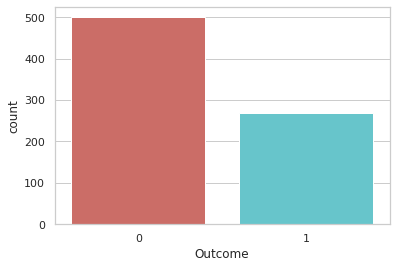

In [ ]:
data['Outcome'].value_counts()
sns.countplot(x='Outcome',data=data, palette='hls')
plt.show()

In [ ]:
# Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
        
# Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m           
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db          
        return self
         
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y
 

In [ ]:
def main() :
      
    # Importing dataset    
    X = data.iloc[:,:-1].values
    Y = data.iloc[:,-1:].values
      
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/4, random_state = 0 )
      
    # Model training    
    model = LogitRegression( learning_rate = 0.01, iterations = 500 )
      
    model.fit( X_train, Y_train )    
    model1 = LogisticRegression()    
    model1.fit( X_train, Y_train)
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    Y_pred1 = model1.predict( X_test )
      
    # measure performance    
    correctly_classified = 0    
    correctly_classified1 = 0
      
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] :            
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", ( 
      correctly_classified / count ) * 100 )
    print( "Accuracy on test set by sklearn model   :  ", ( 
      correctly_classified1 / count ) * 100 )
    
if __name__ == "__main__" :
  main()

Accuracy on test set by our model       :   72.91666666666666
Accuracy on test set by sklearn model   :   80.20833333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
